# MICROSOFT-BOX

#### LET THE KIDS DIRECT THE MOVIES!

##### BUSINESS UNDERSTANDING

The movie industry originated in the early 19th Century and through technological development, we can clearly see the evolution. Starting with the phasing out of black and white to having films with color to now the use of CGI.
The construct of the movie industry is a further continuation of expression of human creativity and the art of storytelling. Therefore, with the combination of visuals, audio and the story, we get movies and the quality then determines it all!
With time, the movie industry met with business and was therefore commercialized subsequently, streaming services were born. 
Microsoft I hear you wish to have a share in this cake. Welcome! 

##### DATA UNDERSTANDING

In [3]:
#import all the necessary libraries
import pandas as pd
import sqlite3
import csv
import numpy as np
import zipfile
conn = sqlite3.connect('data.sqlite')

In [4]:
#open and read first five rows of the tmdb.movies.csv file
df = pd.read_csv(r'C:\Users\User\Documents\Flatiron\tmdb.movies.csv')
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
df.shape

(26517, 10)

In [6]:
#retrieve metadata of the first DataFrame (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
#gives the summary statistics by showing the data each column contains
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [8]:
#open and read the last dataframe we will use df3
df3 = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\rt.movie_info.tsv', sep='\t', encoding='latin1')
df3.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
df3.shape

(1560, 12)

In [10]:
#metadate of df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [11]:
#shows data contained in each column of df3
df3.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


##### DATA PREPARATION

In [12]:
#functions used to check for missing values
df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [13]:
#checking for duplicate values
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [14]:
df['title'].value_counts()

Home                        7
Eden                        7
The Box                     5
Truth or Dare               5
Alone                       5
                           ..
Paralyzed                   1
Monsters: Dark Continent    1
The Golden Rut              1
Anne of Green Gables        1
Ruin Me                     1
Name: title, Length: 24688, dtype: int64

In [15]:
has_nan_in_df = df.isna().any().any()
print(has_nan_in_df)  
# This should print False if df has no NaN values.


False


In [16]:
#checking for missing values in the last dataframe
df3.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [17]:
#checking for duplicate values
duplicates_three = df3[df3.duplicated()]
print(len(duplicates_three))

0


In [18]:
#total sum of missing values in df3 set
df3.isna().sum().sum()

4975

In [19]:
#filled the missing values with N/A instead of dropping 
df5 = df3.fillna(value = 'N/A')
df5.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",N/A,N/A,104 minutes,N/A
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",N/A,N/A,116 minutes,N/A
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",N/A,N/A,128 minutes,N/A
4,7,N/A,NR,Drama|Romance,Rodney Bennett,Giles Cooper,N/A,N/A,N/A,N/A,200 minutes,N/A


In [20]:
df6 = df3.dropna(how= 'any')
df6.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [21]:
has_nan_in_df6 = df6.isna().any().any()
print(has_nan_in_df6) 
# This should print False if df6 has no NaN values.


False


##### DATA ANALYSIS

In [22]:
df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [24]:
#dropping unnecessary columns
columns_to_drop = ['Unnamed: 0', 'original_language', 'original_title', 'release_date', 'vote_count']
columns_to_drop = [col.strip() for col in columns_to_drop]
new_df = df.drop(columns=columns_to_drop, axis=1)
new_df


,genre_ids,id,popularity,title,vote_average
0,"[12, 14, 10751]",12444,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7
1,"[14, 12, 16, 10751]",10191,28.734,How to Train Your Dragon,7.7
2,"[12, 28, 878]",10138,28.515,Iron Man 2,6.8
3,"[16, 35, 10751]",862,28.005,Toy Story,7.9
4,"[28, 878, 12]",27205,27.920,Inception,8.3
...,...,...,...,...,...
26512,"[27, 18]",488143,0.600,Laboratory Conditions,0.0
26513,"[18, 53]",485975,0.600,_EXHIBIT_84xxx_,0.0
26514,"[14, 28, 12]",381231,0.600,The Last One,0.0
26515,"[10751, 12, 28]",366854,0.600,Trailer Made,0.0


In [25]:
df6.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [26]:
#cleaning data by dropping unnecessary data
columns_to_drop3 = ['synopsis', 'director','rating', 'writer', 'dvd_date', 'theater_date', 'runtime','studio']
columns_to_drop3 = [col.strip() for col in columns_to_drop3]
new_df3 = df6.drop(columns=columns_to_drop3, axis=1)
new_df3

,id,genre,currency,box_office
1,3,Drama|Science Fiction and Fantasy,$,"600,000"
6,10,Comedy,$,"41,032,915"
7,13,Drama,$,"224,114"
15,22,Comedy|Drama|Mystery and Suspense,$,"1,039,869"
18,25,Action and Adventure|Drama|Science Fiction and...,$,"20,518,224"
...,...,...,...,...
1530,1968,Comedy|Drama,$,"72,700,000"
1537,1976,Action and Adventure|Art House and International,$,"1,320,005"
1541,1980,Action and Adventure|Science Fiction and Fantasy,$,"25,335,935"
1542,1981,Comedy|Drama,$,"1,416,189"


##### VISUALIZATION

In [27]:
#new_df,new_df3
merge_df = pd.merge(new_df, new_df3, on='id', how='inner')
merge_df.head()

,genre_ids,id,popularity,title,vote_average,genre,currency,box_office
0,"[16, 35, 10751]",863,22.698,Toy Story 2,7.5,Action and Adventure|Art House and Internation...,$,"13,900,000"
1,"[16, 35, 10751]",863,22.698,Toy Story 2,7.5,Action and Adventure|Art House and Internation...,$,"13,900,000"
2,"[28, 53, 878, 12]",95,15.799,Armageddon,6.7,Drama|Sports and Fitness,$,"5,051,927"
3,"[12, 28, 14]",1865,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,Drama,$,"9,262,318"
4,"[27, 28, 53, 80]",755,16.064,From Dusk Till Dawn,7.0,Action and Adventure|Science Fiction and Fantasy,$,"19,375,474"


In [28]:
sorted_data2 = merge_df.sort_values(['vote_average', 'box_office'], ascending=False)
sorted_data2

,genre_ids,id,popularity,title,vote_average,genre,currency,box_office
5,"[18, 36, 10749]",887,9.647,The Best Years of Our Lives,7.8,Comedy|Drama|Romance,$,"13,351,235"
0,"[16, 35, 10751]",863,22.698,Toy Story 2,7.5,Action and Adventure|Art House and Internation...,$,"13,900,000"
1,"[16, 35, 10751]",863,22.698,Toy Story 2,7.5,Action and Adventure|Art House and Internation...,$,"13,900,000"
4,"[27, 28, 53, 80]",755,16.064,From Dusk Till Dawn,7.0,Action and Adventure|Science Fiction and Fantasy,$,"19,375,474"
2,"[28, 53, 878, 12]",95,15.799,Armageddon,6.7,Drama|Sports and Fitness,$,"5,051,927"
3,"[12, 28, 14]",1865,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,Drama,$,"9,262,318"


In [29]:
sorted_data2.shape

(6, 8)

In [30]:
type(sorted_data2['box_office'])

pandas.core.series.Series

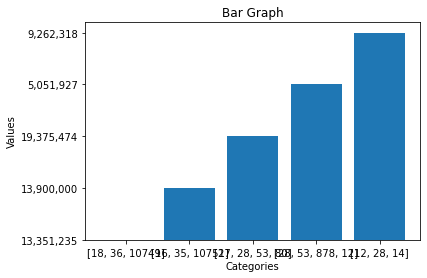

In [31]:
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
categories = sorted_data2['genre_ids']
values = sorted_data2['box_office']

# Create a bar graph
plt.bar(categories, values)

# Add labels and a title
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Graph")

# Show the plot
plt.show()


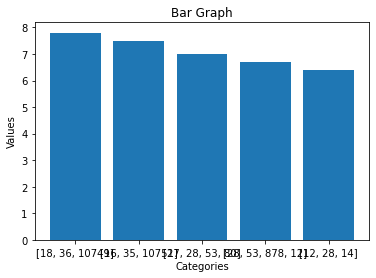

In [32]:
categories = sorted_data2['genre_ids']
values = sorted_data2['vote_average']

# Create a bar graph
plt.bar(categories, values)

# Add labels and a title
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Graph")

# Show the plot
plt.show()

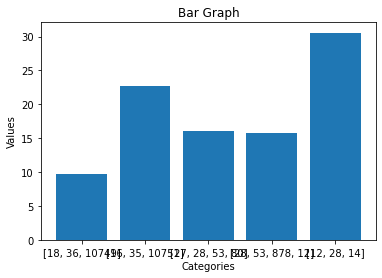

In [33]:
categories = sorted_data2['genre_ids']
values = sorted_data2['popularity']

# Create a bar graph
plt.bar(categories, values)

# Add labels and a title
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Graph")

# Show the plot
plt.show()

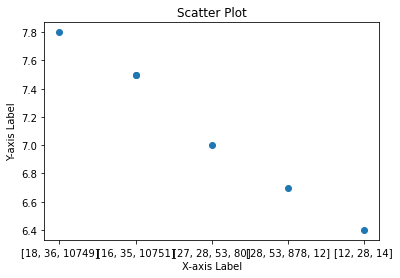

In [34]:
# Sample data (replace this with your own data)
x = sorted_data2['genre_ids']  # Values for the x-axis
y = sorted_data2['vote_average']  # Values for the y-axis

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatter Plot")

# Show the plot
plt.show()


In [ ]:
genre ids to their genre rubric
MOVIE
Action          28 box_office, popularity
Adventure       12 popularity
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18 vote_average
Family          10751
Fantasy         14 popularity
History         36 vote_average
Horror          27 box_office
Music           10402
Mystery         9648
Romance         10749 vote_average
Science Fiction 878
TV Movie        10770
Thriller        53 box_office
War             10752
Western         37

TV SHOW
Action & Adventure  10759
Animation           16
Comedy              35
Crime               80 box_office
Documentary         99
Drama               18
Family              10751
Kids                10762
Mystery             9648
News                10763
Reality             10764
Sci-Fi & Fantasy    10765
Soap                10766
Talk                10767
War & Politics      10768
Western             37

### THE GENRES THAT ARE DOING BEST IN TERMS OF POPULARITY, VOTE AVERAGE AND HOW MUCH THEY EARN ON BOX OFFICE ARE: ACTION, ADVENTURE, DRAMA, FANTASY, HISTORY, HORROR, ROMANCE, THRILLER, DOCUMENTARY
### THE SCATTER PLOT REPRESENTS THE NEGATIVE RELATIONSHIP BETWEEN GENRE AND VOTE AVERAGE